# TITANIC PROBLEM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

link to dataset : https://www.kaggle.com/c/titanic/data

In [2]:
gender=pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h4>Assumptions</h4>
<ul>
    <li>1.Female and children will survive more compared to male(age column changes)</li>
    <li>2.sibsp and parch gives will give new features that passenger is alone or not and no.s doesnot matter</li>
    <li>3.Rich people would have survived</li>
    
    
</ul>

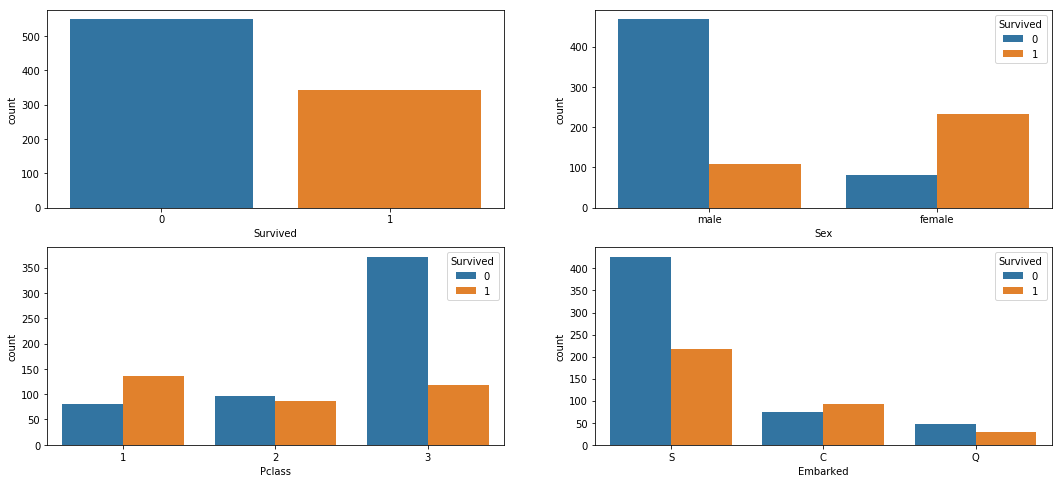

In [5]:
f,ax=plt.subplots(2,2,figsize=(18,8))
sns.countplot('Survived',data=data,ax=ax[0][0])
sns.countplot('Sex',hue='Survived',data=data,ax=ax[0][1])
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1][0])
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1][1])
plt.show()

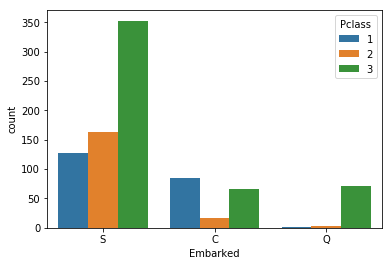

From Q there were very less Pclass 3 people hence survival rate is less


In [6]:
sns.countplot('Embarked',hue='Pclass',data=data)
plt.show()
print("From Q there were very less Pclass 3 people hence survival rate is less")

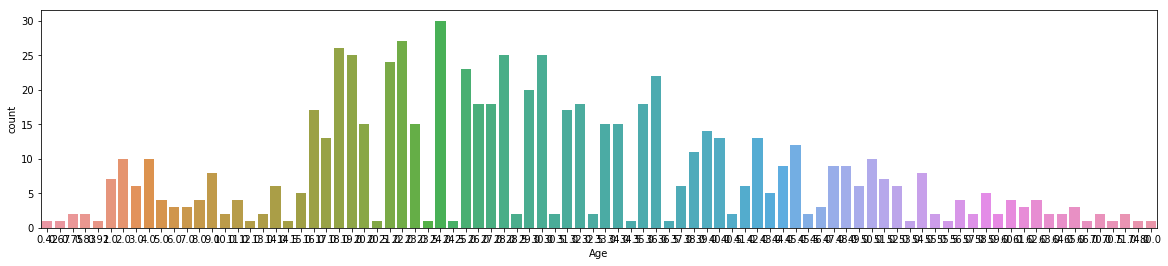

In [7]:
#age
plt.figure(figsize=(20,4))
sns.countplot('Age',data=data)
plt.show()

In [8]:
data[data['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [9]:
data['fmcount']=data['Parch']+data['SibSp']

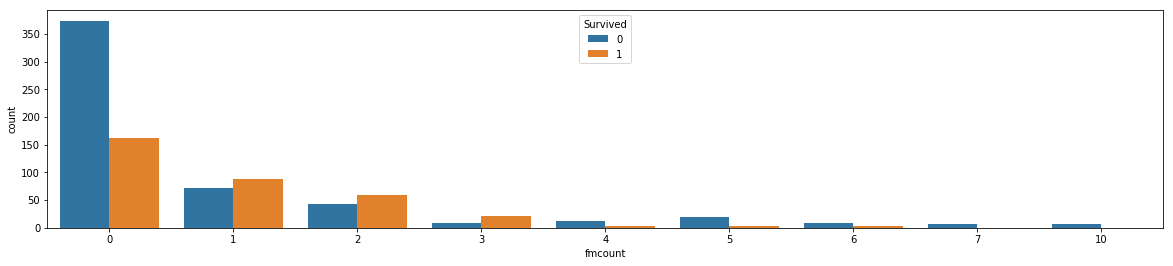

Less the family size more the survival rate


In [10]:
plt.figure(figsize=(20,4))
sns.countplot('fmcount',hue="Survived",data=data)
plt.show()
print("Less the family size more the survival rate")

In [11]:
data['Embarked'].fillna('S',inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data[data['Age']<1]=data['Age'].median()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fmcount
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,0.0


Proved assumptions<br>
1.rich passengers with pclass-3 survived<br>
2.women survived more wrt to men

New conclusions<br>
1.Less family size more survival rate<br>
2.Age range of 14-24 has more survival rate<br>
3.people boarding in southhampton has more survival rate<br>

In [12]:
#binning age and fare
data['Fare_Bin']=pd.qcut(data['Fare'],6)
data.groupby(['Fare_Bin'])['Survived'].mean().to_frame()

data['Fare_cat']=0
data.loc[data['Fare']<=7.775,'Fare_cat']=0
data.loc[(data['Fare']>7.775)&(data['Fare']<=8.662),'Fare_cat']=1
data.loc[(data['Fare']>8.662)&(data['Fare']<=14.454),'Fare_cat']=2
data.loc[(data['Fare']>14.454)&(data['Fare']<=26.0),'Fare_cat']=3
data.loc[(data['Fare']>26.0)&(data['Fare']<=52.369),'Fare_cat']=4
data.loc[data['Fare']>52.369,'Fare_cat']=5

data['Age_cat']=0
data.loc[data['Age']<=16,'Age_cat']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_cat']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_cat']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_cat']=3
data.loc[data['Age']>64,'Age_cat']=4

data[['Age_cat','Fare_cat']].head()

,Age_cat,Fare_cat
0,1,0
1,2,5
2,1,1
3,2,5
4,2,1


In [13]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)


In [14]:
#dropping 
data=data.drop(columns=['PassengerId', 'Name', 'SibSp','Parch', 'Ticket', 'Cabin','Age','Fare','Fare_Bin'])
data.head()

,Survived,Pclass,Sex,Embarked,fmcount,Fare_cat,Age_cat
0,0.0,3.0,0.0,0.0,1.0,0,1
1,1.0,1.0,1.0,1.0,1.0,5,2
2,1.0,3.0,1.0,0.0,0.0,1,1
3,1.0,1.0,1.0,0.0,1.0,5,2
4,0.0,3.0,0.0,0.0,0.0,1,2


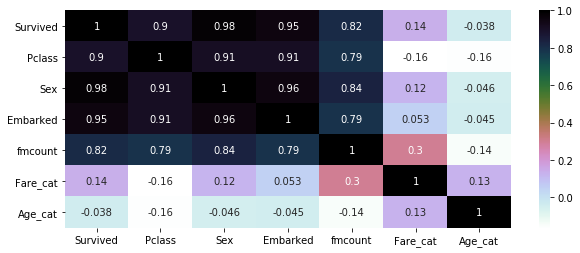

In [15]:
plt.figure(figsize=(10,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'fmcount', 'Fare_cat',
       'Age_cat'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

x=data[['Pclass', 'Sex', 'fmcount', 'Fare_cat', 'Age_cat','Embarked']]
y=data['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44)
print("training data set:",x_train.shape)
print("testing data set:",x_test.shape)

training data set: (596, 6)
testing data set: (295, 6)


In [18]:
data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [19]:
results=pd.DataFrame(columns=['Classifier','MSE'])
results.head()

,Classifier,MSE


In [20]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)
mse=mean_squared_error(yhat,y_test)
print('Mean squared error:',mse)
results=results.append(pd.Series(['Regression',mse],index=results.columns ),ignore_index=True) 

Mean squared error: 0.191275579175187


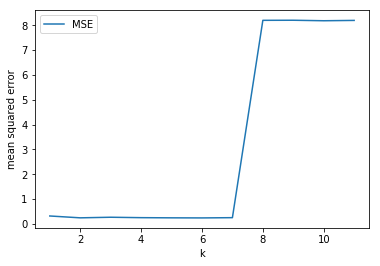

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

x1axes,x2axes=[],[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    x2axes.append(mean_squared_error(yhat,y_test))
    
plt.plot(list(range(1,12)),x2axes,label="MSE")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

In [22]:
results=results.append(pd.Series(['K nearest neighbours',min(x2axes)],index=results.columns ),ignore_index=True) 

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
yhat=clf.predict(x_test)
mse=mean_squared_error(yhat,y_test)
print('Mean squared error:',mse)
print("cross val score:",cross_val_score(clf, x_train, y_train, cv=10).mean())
results=results.append(pd.Series(['Decision Tree',mse],index=results.columns ),ignore_index=True) 

Mean squared error: 0.2542372881355932
cross val score: 0.7786624796798599


C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,C=1.0, solver='lbfgs',multi_class='multinomial')
lr.fit(x_train, y_train)
yhat=lr.predict(x_test)
mse=mean_squared_error(yhat,y_test)
print('Mean squared error:',mse)
results=results.append(pd.Series(['Logistic Regression',mse],index=results.columns ),ignore_index=True) 
print("score:",lr.score(x_train, y_train))

Mean squared error: 0.2440677966101695
score: 0.8104026845637584


C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [25]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
yhat=svc.predict(x_test)
mse=mean_squared_error(yhat,y_test)
results=results.append(pd.Series(['SVC',mse],index=results.columns),ignore_index=True) 
print('Mean squared error:',mse)

Mean squared error: 0.2


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rnd = RandomForestClassifier(n_estimators=100, max_depth=3,
                             random_state=0)
rnd.fit(x_train, y_train)
yhat=rnd.predict(x_test)
mse=mean_squared_error(yhat,y_test)
results=results.append(pd.Series(['Random forest',mse],index=results.columns),ignore_index=True) 
print('Mean squared error:',mse)

Mean squared error: 0.19661016949152543


In [27]:
results

,Classifier,MSE
0,Regression,0.191276
1,K nearest neighbours,0.244068
2,Decision Tree,0.254237
3,Logistic Regression,0.244068
4,SVC,0.200000
5,Random forest,0.196610


In [28]:
test_data=pd.read_csv('test.csv')
test_data.head()
print(test_data.shape)


(418, 11)


In [29]:
test_data['fmcount']=test_data['Parch']+test_data['SibSp']

test_data['Embarked'].fillna('S')
test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare_Bin']=pd.qcut(test_data['Fare'],6)


test_data['Fare_cat']=0
test_data.loc[test_data['Fare']<=7.775,'Fare_cat']=0
test_data.loc[(test_data['Fare']>7.775)&(test_data['Fare']<=8.662),'Fare_cat']=1
test_data.loc[(test_data['Fare']>8.662)&(test_data['Fare']<=14.454),'Fare_cat']=2
test_data.loc[(test_data['Fare']>14.454)&(test_data['Fare']<=26.0),'Fare_cat']=3
test_data.loc[(test_data['Fare']>26.0)&(test_data['Fare']<=52.369),'Fare_cat']=4
test_data.loc[test_data['Fare']>52.369,'Fare_cat']=5


test_data['Age_cat']=0
test_data.loc[test_data['Age']<=16,'Age_cat']=0
test_data.loc[(test_data['Age']>16)&(test_data['Age']<=32),'Age_cat']=1
test_data.loc[(test_data['Age']>32)&(test_data['Age']<=48),'Age_cat']=2
test_data.loc[(test_data['Age']>48)&(test_data['Age']<=64),'Age_cat']=3
test_data.loc[test_data['Age']>64,'Age_cat']=4

test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)


In [30]:
#dropping 
test_data=test_data.drop(columns=['PassengerId', 'Name', 'SibSp','Parch', 'Ticket', 'Cabin','Fare','Age'])
test_data.head()
print(test_data.columns)

Index(['Pclass', 'Sex', 'Embarked', 'fmcount', 'Fare_Bin', 'Fare_cat',
       'Age_cat'],
      dtype='object')


In [31]:
x=test_data[['Pclass', 'Sex', 'fmcount', 'Fare_cat', 'Age_cat','Embarked']]
lm_score=lm.predict(x)
svc_predict=svc.predict(x)
lr_predict=lr.predict(x)
clf_predict=clf.predict(x)
rnd_predict=rnd.predict(x)
print(svc_predict)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [32]:
test_data=pd.read_csv('test.csv')
li=[]
li1=[]
for cnt,pass_id in enumerate(test_data['PassengerId']):
    li1.append(pass_id)
    li1.append(int(svc_predict[cnt]))
    li.append(li1)
    li1=[]

    
# importing the csv module 
import csv 

# data rows of csv file 
rows =li
fields = ['PassengerId','Survived'] 

filename = "lr.csv"

# writing to csv file 
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    
    csvwriter.writerow(fields) 
    csvwriter.writerows(rows)

print("sucessfully saved csv file")

sucessfully saved csv file
